Sentiment analysis - Amazon Health and Personal Care Reviews

In [1]:
!git clone https://gitlab.com/sayantan.world98/sentiment-analysis-amazon-health-and-personal-care.git

Cloning into 'sentiment-analysis-amazon-health-and-personal-care'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 38 (delta 9), reused 38 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 82.19 MiB | 17.06 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (7/7), done.


In [2]:
import pandas as pd

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

In [3]:
df = pd.read_json('/content/sentiment-analysis-amazon-health-and-personal-care/dataset/Health_and_Personal_Care_5.json', lines=True)

In [4]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,5,Handy little gadget,1294185600,"01 5, 2011"
1,AHKSURW85PJUE,159985130X,"AZ buyer ""AZ buyer""","[1, 1]",I would recommend this for a travel magnifier ...,4,Small & may need to encourage battery,1329523200,"02 18, 2012"
2,A38RMU1Y5TDP9,159985130X,"Bob Tobias ""Robert Tobias""","[75, 77]",What I liked was the quality of the lens and t...,4,Very good but not great,1275955200,"06 8, 2010"
3,A1XZUG7DFXXOS4,159985130X,Cat lover,"[56, 60]",Love the Great point light pocket magnifier! ...,4,great addition to your purse,1202428800,"02 8, 2008"
4,A1MS3M7M7AM13X,159985130X,Cricketoes,"[1, 1]",This is very nice. You pull out on the magnifi...,5,Very nice and convenient.,1313452800,"08 16, 2011"


In [5]:
df['overall'].value_counts()

,count
overall,
5,211633
4,68168
3,33254
2,16754
1,16546


In [10]:
positives = df['overall'][(df.overall == 5) | (df.overall == 4)]
negatives = df['overall'][(df.overall == 2) | (df.overall == 1)]
print('Total length of the data is:         {}'.format(df.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

df_pos = df[df['overall'].isin([4, 5])]
df_neg = df[df['overall'].isin([1, 2])]

Total length of the data is:         346355
No. of positve tagged sentences is:  279801
No. of negative tagged sentences is: 33300


In [7]:
df['score'] = df.helpful.apply(lambda x: x[0] / (x[1] + 2))

In [11]:
df_all = pd.concat([df_pos, df_neg])

Perform Binary Classification

In [12]:
def sentiment_score(n):
  if n == 5 or n == 4:
    return 1
  return 0

df_all['overall']=df_all['overall'].apply(lambda x: sentiment_score(x))

In [13]:
df_all['overall'].value_counts()

,count
overall,
1,279801
0,33300


In [14]:
df_all.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,score
0,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,1,Handy little gadget,1294185600,"01 5, 2011",0.333333
1,AHKSURW85PJUE,159985130X,"AZ buyer ""AZ buyer""","[1, 1]",I would recommend this for a travel magnifier ...,1,Small & may need to encourage battery,1329523200,"02 18, 2012",0.333333
2,A38RMU1Y5TDP9,159985130X,"Bob Tobias ""Robert Tobias""","[75, 77]",What I liked was the quality of the lens and t...,1,Very good but not great,1275955200,"06 8, 2010",0.949367
3,A1XZUG7DFXXOS4,159985130X,Cat lover,"[56, 60]",Love the Great point light pocket magnifier! ...,1,great addition to your purse,1202428800,"02 8, 2008",0.903226
4,A1MS3M7M7AM13X,159985130X,Cricketoes,"[1, 1]",This is very nice. You pull out on the magnifi...,1,Very nice and convenient.,1313452800,"08 16, 2011",0.333333


In [15]:
df_all = df_all.drop(['reviewerName', 'helpful', 'unixReviewTime', 'reviewTime', 'score', 'summary', 'asin', 'reviewerID'], axis=1)

In [16]:
df_all.head()

,reviewText,overall
0,This is a great little gadget to have around. ...,1
1,I would recommend this for a travel magnifier ...,1
2,What I liked was the quality of the lens and t...,1
3,Love the Great point light pocket magnifier! ...,1
4,This is very nice. You pull out on the magnifi...,1


In [17]:
df_all.reset_index().drop(['index'], axis=1)

,reviewText,overall
0,This is a great little gadget to have around. ...,1
1,I would recommend this for a travel magnifier ...,1
2,What I liked was the quality of the lens and t...,1
3,Love the Great point light pocket magnifier! ...,1
4,This is very nice. You pull out on the magnifi...,1
...,...,...
313096,"Okay, I'll give you the good stuff first, and ...",0
313097,A wireless TENS unit seemed like such a good i...,0
313098,Want to know what's really suspicious about th...,0
313099,I love that the product works but I do not hav...,0


Data Visualization

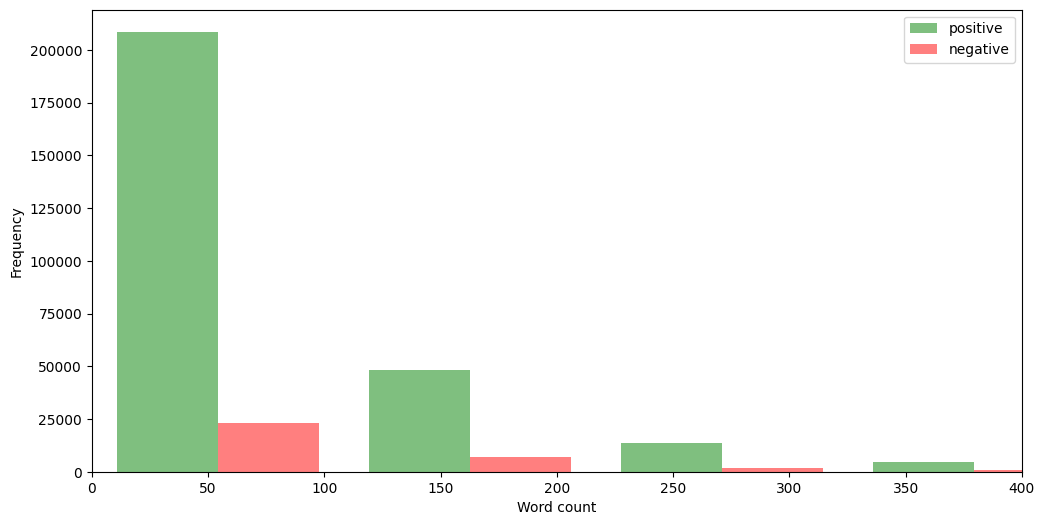

In [18]:
def word_count(words):
    return len(words.split())

df_all['word count'] = df_all['reviewText'].apply(word_count)

p = df_all['word count'][df_all.overall == 1]
n = df_all['word count'][df_all.overall == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,400)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'], bins=50)
plt.legend(loc='upper right')

In [19]:
df_all = df_all.drop(['word count'], axis=1)

Data Processing

In [20]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
wordLemm = WordNetLemmatizer()

def process_reviews(review):
    review = review.lower()
    review = review.translate(str.maketrans("","",string.punctuation))
    tokens = word_tokenize(review)
    final_tokens = [w for w in tokens if w not in stopword]
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [22]:
df_all['reviewText'] = df_all['reviewText'].astype('str')

In [23]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [27]:
import nltk

nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)

try:
    nltk.download('punkt_tab', quiet=True)
except LookupError:
    print("Warning: 'punkt_tab' resource not found or could not be downloaded.")

wordLemm = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

def process_reviews(review):
    review = review.lower()
    review = review.translate(str.maketrans("","",string.punctuation))
    tokens = word_tokenize(review)
    final_tokens = [w for w in tokens if w not in stopword]
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

df_all['processed_reviews'] = df_all['reviewText'].apply(lambda x: process_reviews(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [28]:
df_all

,reviewText,overall,processed_reviews
0,This is a great little gadget to have around. ...,1,great little gadget around weve already used l...
1,I would recommend this for a travel magnifier ...,1,would recommend travel magnifier occasional re...
2,What I liked was the quality of the lens and t...,1,liked quality lens built light lens discernabl...
3,Love the Great point light pocket magnifier! ...,1,love great point light pocket magnifier work g...
4,This is very nice. You pull out on the magnifi...,1,nice pull magnifier want light come slide back...
...,...,...,...
345879,"Okay, I'll give you the good stuff first, and ...",0,okay ill give good stuff first ill tell get tw...
345887,A wireless TENS unit seemed like such a good i...,0,wireless ten unit seemed like good idea freedo...
346071,Want to know what's really suspicious about th...,0,want know whats really suspicious product revi...
346303,I love that the product works but I do not hav...,0,love product work lot weight need get rid look...


Vectorization and Splitting the data

In [29]:
X = df_all['processed_reviews'].values
y = df_all['overall'].values

In [30]:
print(X.shape)
print(y.shape)

(313101,)
(313101,)


Convert text to word frequency vectors

In [31]:
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')

Vector fitted.


In [32]:
print(X.shape)
print(y.shape)

(313101, 327943)
(313101,)


Split train and test

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

Evaluating the Model

In [34]:
def model_Evaluate(model):
    acc_train=model.score(X_train, y_train)
    acc_test=model.score(X_test, y_test)

    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    cf_matrix = confusion_matrix(y_test, y_pred)

    print(cf_matrix)
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'YlGn',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Logistic Regression

Accuracy of model on training data : 93.46774193548387
Accuracy of model on testing data : 92.72448539627281 

              precision    recall  f1-score   support

           0       0.79      0.44      0.56      6738
           1       0.94      0.99      0.96     55883

    accuracy                           0.93     62621
   macro avg       0.86      0.71      0.76     62621
weighted avg       0.92      0.93      0.92     62621

[[ 2946  3792]
 [  764 55119]]


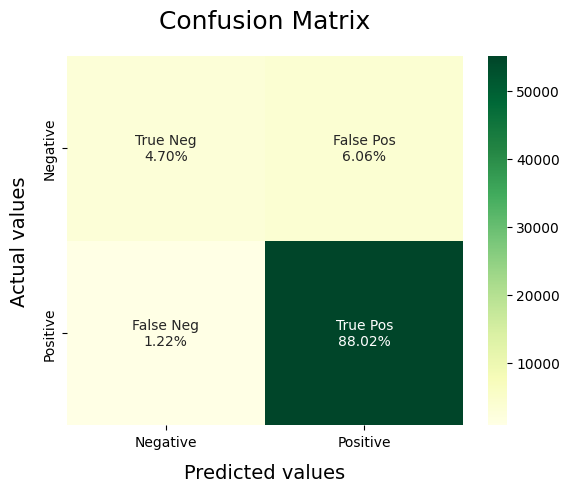

In [35]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
model_Evaluate(lg)

Model Saving, Loading and Prediction

In [36]:
import pickle

file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

file = open('logisticRegression.pickle','wb')
pickle.dump(lg, file)
file.close()

Conclusion

We can use the Logistic Regression for most cases and it will yeild good results.

Predict using saved model

In [37]:
def load_models():
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    file = open('logisticRegression.pickle', 'rb')
    lg = pickle.load(file)
    file.close()
    return vectoriser, lg

In [38]:
def predict(vectoriser, model, text):
    processes_text=[process_reviews(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    sentiment = model.predict(textdata)

    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [39]:
if __name__=="__main__":
    vectoriser, lg = load_models()

    text = ["Such an amazing trimmer. It is a must buy for anyone who is thinking to buy a trimmer. It is a multipurpose trimmer which has got 10 modes with custom settings. Completely satisfied with the purchase.",
            "Absolute garbage. Do not buy this, I would give this zero star if possible.",
            "Definitely worth it if you can sell one of your kidney to afford it. The price makes it really unique from all other products."]

    df = predict(vectoriser, lg, text)
    print(df.head())

                                                text sentiment
0  Such an amazing trimmer. It is a must buy for ...  Positive
1  Absolute garbage. Do not buy this, I would giv...  Negative
2  Definitely worth it if you can sell one of you...  Positive
